<center><img src="img/header.png"></center>

<h1><center>Введение в машинное обучение</center></h1>
<hr>
<h2><center>Лекция 10: Нейронные сети. Основы.</center></h2>
<h3><center>Шестаков Андрей</center></h3>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print(u'Так надо')

# Примеры использования

## Описание изображений и детектирование объектов


<center><img src='./img/nn-img-descr.png'></center>

## Добавление цветов
<center><img src='./img/nn-bw2col.png'></center>

## Победить людишек в играх

<center><img src='./img/nn-skynet.png'></center>

## Генерация изображения

<center><img src='./img/nn-img-from-scratch.png'></center>

### Генерация изображений
<center><img src='./img/nn-style-transfer.png'></center>

## NLP модели

<center><img width=800 src='./img/openai-gpt-3.png'></center>
<center><img width=600 src='./img/hilton-gtp3.png'></center>

# Аналогия с "биологическим" мозгом

* "Искусственные" нейронные сети - попытка имитировать работу "биологического" мозга
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"> <img width=400 src='img/human_brain.png'></th>
    <th class="tg-031e"> <img width=500 src='img/neural-network-cells.jpg'></th>
  </tr>
</table>

    * Человеческий мозг состоит из нескольких связанных областей, которые в свою очеред состоят из нейронов
    * каждый нейрон время от времени посылает другим нейронам электрические импульсы
    * частота подачи сигналов нейрона зависит от сигналов связанных с ним других нейронов
    * нейроны могут находиться в двух состояниях - активном (накопленных заряд связанных нейронов высокий) и неактивном (накопленных заряд связанных нейронов низкий)

## [Краткая история](https://www.import.io/post/history-of-deep-learning/)

* 1943 – Предложена математическая модель нейронов (Walter Pitts и Warren McCulloch)
* 1957 – Введение теоретических основ глубоких нейронных сетей (Frank Rosenblatt)
* 1965 – Первая "глубокая" нейронная сеть
* 1979-80 – Распозначавание образов с помощью NN
* 1989 – Распознавание рукописных символов (Yann LeCun)
* 1997 – Создание Long short-term memory (LSTM) рекурентной нейронной сети (Jürgen Schmidhuber и Sepp Hochreiter)
* 2011 – AlexNet
* 2014 – Generative Adversarial Networks (GAN)
* ....

# Модель нейрона

<center><img src='img/neuron-diagram.jpg'></center>

* Вершины слева - входящие значения (аналогия - значения признаков объекта)
* Связи - веса между нейронами (аналогия - веса линейной(логистической) регрессии)
* Порог или смещение $b$ (аналогия - свободный член в линейной модели)
* $f(\cdot)$ - функция активации. Некоторое преобразование от суммарного входа в нейрон
* Выход нейрона -  $f(b + w_{1}x^{1}+w_{2}x^{2}+...+w_{D}x^{D})$


## Линейная регрессия как нейронная сеть

* Кажется очевидным, что с помощью модели выше можно задать модель линейной регрессии. Для этого надо только определить
    * Какой будет вид у $f(\cdot)$
    * Функцию потерь $L(\cdot)$

## Логистическая регрессия как нейронная сеть

* Как с помощью модели выше задать логистическую регрессию?
    * Какой будет вид у $f(\cdot)$
    * Функция потерь $L(\cdot)$

## Можно не ограничиваться одним нейроном и объединять их в слои!

<center><img src='img/nn-layers.png'></center>

* У каждого нейрона есть вход и выход
* Нейроны объединяются в слои:
    * Входящий (входные данные)
    * Скрытый(-ые) (все промежуточные нейроны)
    * Выходящий (ответ нейронной сети целеком)

## [TensorFlow PlayGround](https://playground.tensorflow.org)

## Немного про функции активации
* В начале занятия были разные слова про активацию нейронов
* В математическом смысле это значило бы, что $f(\cdot)$ - это пороговая функция
* Если $b + w_{1}x^{1}+w_{2}x^{2}+...+w_{D}x^{D} > 0$ то $f(\cdot) = 1$ и $0$ - иначе
* Проблема в том, что с такими функциями неприятно работать - считать производные для корректировки весов и тп
* Выход - преложить сглаженные аналоги пороговой функции 

<center><img src='img/sigmoid approximates step function.png'></center>

### Стандартные функции активации

* сигмойда: $\sigma(x)=\frac{1}{1+e^{-x}}$ 
     * 1-layer neural network with sigmoidal activation is equivalent to logistic regression
     <center><img src='img/sigmoid-activation-function.png', width=700></center>
* гиперболический тангенс: $tangh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$ 
    <center><img src='img/tanh-1.png', width=700></center>


* ReLU: $f(x)=[x]_{+}$.

<center><img src='img/relu-activation-function-1.png', width=700></center>

### А вообще их очень много разных

<center><img src='img/activ_functions.png', width=1200></center>

# Обучение нейронных сетей

* Короткий ответ - с помощью градиентного спуска и **обратного распространения ошибки**
* Вспомним основные ингридиенты градиентного спуска:
    * Функция потерь - $L(y,\hat{y})$
    * Градиенты весов - $\nabla_w L = \left( \frac{\partial L}{\partial w_i} \right)$
    * Вдвиг весов - $w = w - \alpha\nabla_w L$

## Немного формул

<center><img src='img/nn-layers.png'></center>

* Обозначим каждый нейрон через $j$.
* Пусть $I_{j}$ - вход в нейрон $j$, $O_{j}$ - выход из нейрона $j$
* Тогда $j$: $I_{j}=\sum_{k\in inc(j)}w_{kj}O_{k}+w_{0j}$,
* И $j$: $O_{j}=f(I_{j})$.

    * $w_{0j}$ - свободный коэффициент
    * $f(x)$ функция активации
    * $inc(j)$ можество нейроной, который идут на вход в $j$.
    * Для простоты будем считать, что во всех формулах уже по умолчанию включет свободный коэффициент

$$
I_{j}=\sum_{k\in inc(j)}w_{kj}O_{k} 
$$

## Backpropagation (Обратное распространение ошибок)


<center><img src='img/backprop_spidey.jpeg', width=800></center>

## Идея

<center><img src='img/backprop.png'></center>

## Еще формулы

* Пусть $w_{ij}$ - вес, расположеный на связи между $i$-м и $j$-м нейроном
* Запишем "ошибку на $j$-м нейроне" как $\delta_j = \frac{\partial L}{\partial I_j} =  \frac{\partial L}{\partial O_j}\frac{\partial O_j}{\partial I_j}$
* Так как ошибка $L$ зависи от $w_{ij}$ как $L(w_{ij}) = L\left(O_j\left(I_j(w_{ij})\right)\right)$, воспользуемся правилом дифференцирования сложной функции:
$$ \frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial I_j}\frac{\partial I_j}{\partial w_{ij}} = \delta_j O_i$$
так как $\frac{\partial I_j}{\partial w_{ij}} = \frac{\partial}{\partial w_{ij}} \left(\sum\limits_{k\in inc(j)} w_{kj} O_k\right) = O_i$


## Случай выходного слоя

* Если нейрон $j$ относится к выходному слою, то $\delta_j$ считается не сложно
$$ \delta_j= \frac{\partial L}{\partial O_j}\frac{\partial O_j}{\partial I_j} = \frac{\partial L}{\partial O_j} f'(I_j) \qquad (1)$$
* Пример:
    * Функция потерь $L = \frac{1}{2}\sum\limits_{j\in OL}(O_j - y)^2$
    $$ \frac{\partial L}{\partial O_j} = O_j - y $$
    * Функция активации - сигмойда $O_j = \sigma(I_j)$:
    $$ f'(I_j) = \sigma(I_j)(1-\sigma(I_j)) = O_j(1-O_j) $$
    * Тогда
    $$ \delta_j = (O_j - y_j)O_j(1-O_j)$$

## Случай промежуточных слоев

* Пусть нейрон $j$ относится к промежуточному слою
* Обозначим через $out(j) = \{k_1, k_2, \dots, k_m\}$ множество нейронов, которые принимают на вход $j$ 
* Влияние $O_j$ на функцию потерь $L$ характеризуется через $I_{k_1},I_{k_2},\dots,I_{k_m}$, поэтому
$$ \frac{\partial L(O_j)}{\partial O_j} = \frac{\partial L(I_{k_1},I_{k_2},\dots,I_{k_m})}{\partial O_j} = \sum\limits_{k\in out(j)} \left( \frac{\partial L}{\partial I_k} \frac{\partial I_k}{\partial O_j} \right) = \sum\limits_{k\in out(j)} \left(\delta_k w_{jk}\right)$$
* Для нейронов промежуточного слоя имеем:
$$ \delta_j = \frac{\partial L}{\partial I_j} =  \frac{\partial L}{\partial O_j}\frac{\partial O_j}{\partial I_j} = \sum\limits_{k\in out(j)} \left(\delta_k w_{jk}\right) f'(I_j) \qquad (2)$$
* А производные весов считаются следующим образом:
$$ \frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial I_j}\frac{\partial I_j}{\partial w_{ij}} = \delta_jO_i \qquad (3)$$


## Шаги алгоритма

1. Пускаем в прямом направлении сети объект $x_n$, запоминаем $I_j$ и $O_j$ каждого нейрона
2. Считаем $\delta_i$ для каждого нейрона $i \in$ по формуле $(1)$
$$ \delta_j = \frac{\partial L}{\partial O_j} f'(I_j) $$
3. Распростнанем $\delta_i$ в обратном направлении по слоям $(2)$
$$ \delta_j = \sum\limits_{k\in out(j)} \left(\delta_k w_{jk}\right) f'(I_j)$$
4. Считаем производные весов $\frac{\partial L}{\partial w_{ij}}$ по формлуе $(3)$
$$ \frac{\partial L}{\partial w_{ij}} = \delta_jO_i $$
И обновляем их


<center><img src='img/backprop2.gif'></center>

### Проблема локального минимума

* Функция потерь является **не выпуклой**.
<center><img src='img/optimization.gif'></center>

In [3]:
def sigmoid(x):
    return 1./(np.exp(-x) + 1)

### Проблема затухающих градиентов

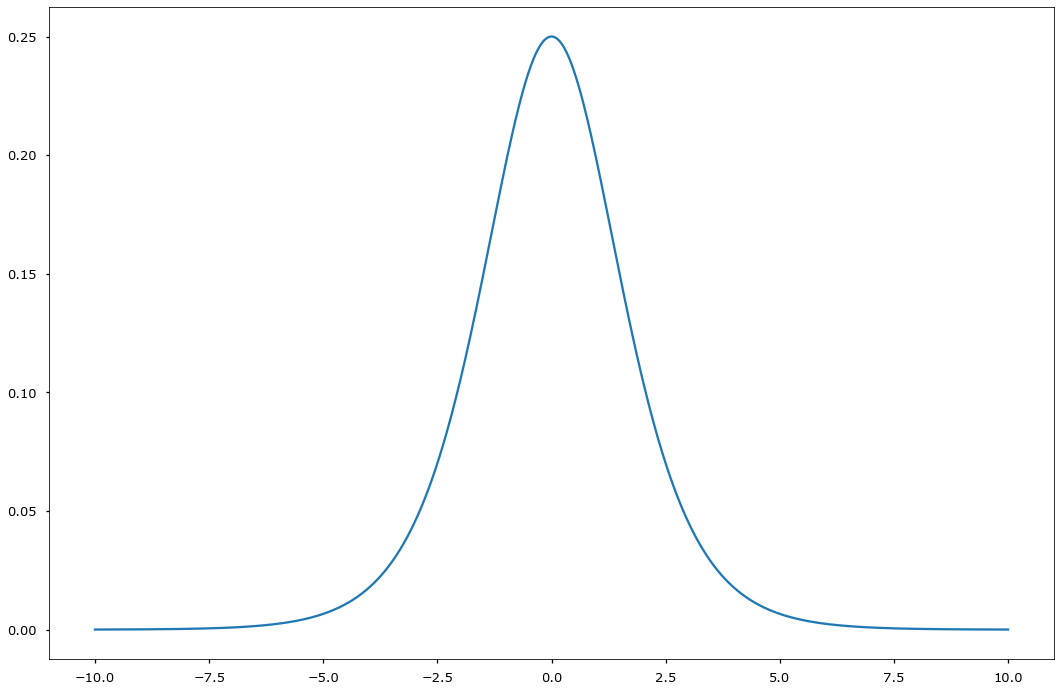

In [4]:
x = np.linspace(-10, 10, 1000)
gr_sigm = sigmoid(x)*(1-sigmoid(x))

plt.plot(x, gr_sigm)

### Может помочь
* Нормализация признаков
* Хорошая инициализация весов [подробнее тут](http://www.deeplearning.ai/ai-notes/initialization/)
* Использование функции активации ReLU

## Регуляризация

* Упрощение модели:
    * понижаем количество слоев и нейронов
* Классические техники ограничения весов
    * L2 regularization
    $$ L(w) + \lambda\sum_i w_i^2 $$
* Аугментация данных
* Dropout

## Dropout

<center><img src='img/dropout.png'></center>


# Полезные ссылки
* [Yes you should understand backprop](https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b)
* [CS231N](http://cs231n.github.io/)
* [Кодинг нейронки с 0](https://www.youtube.com/watch?v=o64FV-ez6Gw)
* [Про обучение еще более детально](https://www.deeplearningbook.org/contents/mlp.html)